In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Объект Series

In [2]:
obj = Series([4,7,-5,3])
obj2 = Series([4, 7, -5, 3], index=['d', 'Ь', 'а', 'с'])

In [3]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [4]:
obj2

d    4
Ь    7
а   -5
с    3
dtype: int64

**Для выборки одного или нескольких элементов из объекта Series можно использовать значения индекса**

In [5]:
obj = Series([4,7,-5,3])
obj2[[1, 2, 3]]

C:\Users\Daily\AppData\Local\Temp\ipykernel_7916\1845565386.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj2[[1, 2, 3]]


Ь    7
а   -5
с    3
dtype: int64

**C Series'ами можно производить фильтрацию с помощью булева массива, скалярное умножение и применение математических функций.**


In [6]:
obj2[obj2 > 0]

d    4
Ь    7
с    3
dtype: int64

In [7]:
obj2 * 2

d     8
Ь    14
а   -10
с     6
dtype: int64

In [8]:
np.exp(obj)

0      54.598150
1    1096.633158
2       0.006738
3      20.085537
dtype: float64

**Объект Series можно также представлять себе как упорядоченный словарь фиксированной длины, поскольку он отображает индекс на данные. Его можно передавать многим функциям, ожидающим получить словарь.**

In [9]:
sdata = { 'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### Полезные методы Series

```
obj_example = Series(data)
obj_example.isnull() 
obj_example.notnull()
```

# Объект DataFrame

In [10]:
data = {"city": ["Барнаул","Новокузнецк","Онталия", "Благовещенск","Якутск"],
		"year": [2000, 2001, 2002,2001, 2002],
		"pop": [1.5, 1.7, 3.6, 2.4, 2.9]}
data_frame = pd.DataFrame(data)
data_frame

,city,year,pop
0,Барнаул,2000,1.5
1,Новокузнецк,2001,1.7
2,Онталия,2002,3.6
3,Благовещенск,2001,2.4
4,Якутск,2002,2.9


In [11]:
data_frame["city"]

0         Барнаул
1     Новокузнецк
2         Онталия
3    Благовещенск
4          Якутск
Name: city, dtype: object

**Если передать конструктору DataFrame словарь словарей , то ключи внешнего словаря будут интерпретированы как столбцы, а ключи внутреннего словаря - как индексы строк.**

In [12]:
data = {"nevada": {2001:2.4, 2002: 2.9}, "ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6}}
data_frame = DataFrame(data)
data_frame

,nevada,ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


**Результат можно транспонировать**

In [13]:
data_frame.T

,2001,2002,2000
nevada,2.4,2.9,NaN
ohio,1.7,3.6,1.5


## Что можно передать в DataFrame


| Тип                                    | Примечания                                                                                                            |
| -------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| Двумерный ndarray                      | Матрица данных, дополнительно можно передать метки строк и стольцов                                                   |
| Словарь массивов, списков или кортежей | Каждая последовательность становиться столбцом объекта DataFrame. Все последовательности должны быть одинаковой длины |
| Словарь объектов Series                | Каждое значение становится столбцом. Ключ объединяются и образуют индексы строк результата                            |
| Словарь словарей                       | Каждый внутренний словарь становится столбцом. Ключи - индексы строк                                                  |
| Список словарей или список Series      | Каждый элемент списка становится строкой объекта DataFrame.                                                           |


# Базовая функциональность

## Переиндексация DataFrame

In [14]:
data_frame = DataFrame([[1,2,3],[4,5,6],[7,8,9]], index =['a','c','d'],columns=["Абхазия","Испания","Юар"])
data_frame

,Абхазия,Испания,Юар
a,1,2,3
c,4,5,6
d,7,8,9


In [15]:
data_frame_2 = data_frame.reindex(['a','b','c','d'])
data_frame_2

,Абхазия,Испания,Юар
a,1.0,2.0,3.0
b,NaN,NaN,NaN
c,4.0,5.0,6.0
d,7.0,8.0,9.0


In [16]:
data_frame_3 = data_frame.reindex(columns=["Абхазия", "Ispania","Юар"])
data_frame_3

,Абхазия,Ispania,Юар
a,1,NaN,3
c,4,NaN,6
d,7,NaN,9


## Удаление элементов из DataFrame

In [17]:
data = {"city": ["Барнаул","Новокузнецк","Онталия", "Благовещенск","Якутск"],
		"year": [2000, 2001, 2002,2001, 2002],
		"pop": [1.5, 1.7, 3.6, 2.4, 2.9]}
data_frame = pd.DataFrame(data)
data_frame.drop([0,3])

,city,year,pop
1,Новокузнецк,2001,1.7
2,Онталия,2002,3.6
4,Якутск,2002,2.9


In [18]:
data = {"city": ["Барнаул","Новокузнецк","Онталия", "Благовещенск","Якутск"],
		"year": [2000, 2001, 2002,2001, 2002],
		"pop": [1.5, 1.7, 3.6, 2.4, 2.9]}
data_frame = pd.DataFrame(data)
data_frame.drop(["year"], axis=1)

,city,pop
0,Барнаул,1.5
1,Новокузнецк,1.7
2,Онталия,3.6
3,Благовещенск,2.4
4,Якутск,2.9


## Доступ по индексу

In [19]:
data = {"city": ["Барнаул","Новокузнецк","Онталия", "Благовещенск","Якутск"],
		"year": [2000, 2001, 2002,2001, 2002],
		"pop": [1.5, 1.7, 3.6, 2.4, 2.9]}
data_frame = pd.DataFrame(data)
data_frame["city"]

0         Барнаул
1     Новокузнецк
2         Онталия
3    Благовещенск
4          Якутск
Name: city, dtype: object

In [20]:
data_frame[:2]

,city,year,pop
0,Барнаул,2000,1.5
1,Новокузнецк,2001,1.7


In [21]:
data_frame[data_frame["year"]>2001]

,city,year,pop
2,Онталия,2002,3.6
4,Якутск,2002,2.9


## Булев DataFrame

In [22]:
data_frame = DataFrame(np.arange(16).reshape(4,4))
data_frame

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [23]:
data_frame < 5

,0,1,2,3
0,True,True,True,True
1,True,False,False,False
2,False,False,False,False
3,False,False,False,False


In [24]:
data_frame[data_frame < 5] = 0
data_frame

,0,1,2,3
0,0,0,0,0
1,0,5,6,7
2,8,9,10,11
3,12,13,14,15


## Арифметические операции

In [25]:
df_1 = DataFrame(np.arange(9.) . reshape((3, 3)), columns=list('bcd'),index = ['A1', 'B2', 'C3'])
df_2 = DataFrame(np.arange(12.) . reshape((4, 3)), columns=list('bde'),index = ['A1', 'B2', 'C3','C4'])

In [26]:
df_1

,b,c,d
A1,0.0,1.0,2.0
B2,3.0,4.0,5.0
C3,6.0,7.0,8.0


In [27]:
df_2

,b,d,e
A1,0.0,1.0,2.0
B2,3.0,4.0,5.0
C3,6.0,7.0,8.0
C4,9.0,10.0,11.0


In [28]:
df_1.add(df_2)

,b,c,d,e
A1,0.0,NaN,3.0,NaN
B2,6.0,NaN,9.0,NaN
C3,12.0,NaN,15.0,NaN
C4,NaN,NaN,NaN,NaN


In [29]:
df_1.add(df_2,fill_value=0)

,b,c,d,e
A1,0.0,1.0,3.0,2.0
B2,6.0,4.0,9.0,5.0
C3,12.0,7.0,15.0,8.0
C4,9.0,NaN,10.0,11.0


## Применение функций

In [30]:
df_1 = DataFrame(np.random.randn(4,3), columns=list('bcd'),index = ['A1', 'B2', 'C3','C4'])
df_1

,b,c,d
A1,-0.054819,1.968591,-0.049421
B2,0.236245,0.591164,0.679656
C3,1.525919,0.596976,-1.989827
C4,0.071303,0.229564,-0.282733


In [31]:
df_1.abs()

,b,c,d
A1,0.054819,1.968591,0.049421
B2,0.236245,0.591164,0.679656
C3,1.525919,0.596976,1.989827
C4,0.071303,0.229564,0.282733


In [32]:
def func_1(x):
    return x.max() - x.min()
df_1.apply(func_1, axis=1)

A1    2.023410
B2    0.443411
C3    3.515745
C4    0.512297
dtype: float64

In [33]:
df_1.apply(func_1)

b    1.580738
c    1.739027
d    2.669482
dtype: float64

In [34]:
def func_2(x):
    return x + 2
df_1

,b,c,d
A1,-0.054819,1.968591,-0.049421
B2,0.236245,0.591164,0.679656
C3,1.525919,0.596976,-1.989827
C4,0.071303,0.229564,-0.282733


In [35]:
df_1.map(func_2)

,b,c,d
A1,1.945181,3.968591,1.950579
B2,2.236245,2.591164,2.679656
C3,3.525919,2.596976,0.010173
C4,2.071303,2.229564,1.717267


## Сортировка

In [36]:
df_1 = DataFrame(np.random.randn(4,3), columns=list('bcd'),index = ['A1', 'B2', 'C3','C4'])
df_1

,b,c,d
A1,0.427683,0.264064,-1.083692
B2,0.815966,-0.499072,0.290871
C3,-1.260250,-0.817432,-0.757402
C4,-2.655263,0.161674,0.453337


In [37]:
df_1.sort_index()

,b,c,d
A1,0.427683,0.264064,-1.083692
B2,0.815966,-0.499072,0.290871
C3,-1.260250,-0.817432,-0.757402
C4,-2.655263,0.161674,0.453337


In [38]:
df_1.sort_index(axis=1)

,b,c,d
A1,0.427683,0.264064,-1.083692
B2,0.815966,-0.499072,0.290871
C3,-1.260250,-0.817432,-0.757402
C4,-2.655263,0.161674,0.453337


In [39]:
df_1.sort_index(axis=1, ascending=False)

,d,c,b
A1,-1.083692,0.264064,0.427683
B2,0.290871,-0.499072,0.815966
C3,-0.757402,-0.817432,-1.260250
C4,0.453337,0.161674,-2.655263


In [40]:
df = DataFrame({'b': [4,7,-3,2] , 'a': [0,1,0,1]})
df

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [41]:
df.sort_values(['a','b'],ascending=(False,False))

,b,a
1,7,1
3,2,1
0,4,0
2,-3,0


## Уникальные значения, счетчики значений и членство

In [42]:
df = DataFrame({'b': [4,7,-3,2] , 'a': [0,1,0,1]})
df

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [43]:
df["a"].unique

<bound method Series.unique of 0    0
1    1
2    0
3    1
Name: a, dtype: int64>

In [44]:
df

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [45]:
df["a"].value_counts()

a
0    2
1    2
Name: count, dtype: int64

In [46]:
df

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [47]:
df["a"].isin([0,2])

0     True
1    False
2     True
3    False
Name: a, dtype: bool

In [48]:
df[df["a"].isin([0,2])]

,b,a
0,4,0
2,-3,0


In [49]:
df[~df["a"].isin([0,2])]

,b,a
1,7,1
3,2,1


# Обработка и фильтрация отсутствующих данных

## Фильтрация

In [50]:
df = DataFrame({"a": [1,2,None,None],"b":[0,0,0,0],"c":[np.nan, "Yes", "No","Yes"]})
df

,a,b,c
0,1.0,0,NaN
1,2.0,0,Yes
2,NaN,0,No
3,NaN,0,Yes


In [51]:
df["c"].isnull()

0     True
1    False
2    False
3    False
Name: c, dtype: bool

In [52]:
df["c"].notnull()

0    False
1     True
2     True
3     True
Name: c, dtype: bool

In [53]:
df

,a,b,c
0,1.0,0,NaN
1,2.0,0,Yes
2,NaN,0,No
3,NaN,0,Yes


In [54]:
df["a"].dropna()

0    1.0
1    2.0
Name: a, dtype: float64

In [55]:
df.dropna()

,a,b,c
1,2.0,0,Yes


In [56]:
df = DataFrame(np.random.randn( 7, 3))
df.loc[:4, 1] = None
df.loc[:2, 2] = None
df

,0,1,2
0,-0.319472,NaN,NaN
1,0.373747,NaN,NaN
2,0.088175,NaN,NaN
3,1.152507,NaN,-1.796710
4,0.858878,NaN,-0.085112
5,0.717754,1.369298,0.928627
6,-0.817410,-0.558433,-0.507524


In [57]:
df.dropna(thresh=3)

,0,1,2
5,0.717754,1.369298,0.928627
6,-0.817410,-0.558433,-0.507524


## Заполнение пропусков

In [58]:
df = DataFrame(np.random.randn( 7, 3))
df.loc[:4, 1] = None
df.loc[:2, 2] = None
df

,0,1,2
0,-1.726308,NaN,NaN
1,-1.259360,NaN,NaN
2,0.039341,NaN,NaN
3,1.118915,NaN,-1.534313
4,1.903187,NaN,0.328857
5,0.530669,0.583583,0.858872
6,-0.584687,0.723543,2.026903


In [59]:
df.fillna(0)

,0,1,2
0,-1.726308,0.000000,0.000000
1,-1.259360,0.000000,0.000000
2,0.039341,0.000000,0.000000
3,1.118915,0.000000,-1.534313
4,1.903187,0.000000,0.328857
5,0.530669,0.583583,0.858872
6,-0.584687,0.723543,2.026903


In [60]:
df.fillna({1: -1, 2:1})

,0,1,2
0,-1.726308,-1.000000,1.000000
1,-1.259360,-1.000000,1.000000
2,0.039341,-1.000000,1.000000
3,1.118915,-1.000000,-1.534313
4,1.903187,-1.000000,0.328857
5,0.530669,0.583583,0.858872
6,-0.584687,0.723543,2.026903


# Объединение данных merge и concat

In [61]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value": [1, 2, 3, 4]})
df1

,key,value
0,A,1
1,B,2
2,C,3
3,D,4


In [62]:
df2 = pd.DataFrame({"key": ["B", "D", "E", "F"], "value": [5, 6, 7, 8]})
df2

,key,value
0,B,5
1,D,6
2,E,7
3,F,8


In [63]:
pd.merge(df1, df2, on="key", how="inner")

,key,value_x,value_y
0,B,2,5
1,D,4,6


In [64]:
pd.concat([df1, df2], axis=0, ignore_index=True)

,key,value
0,A,1
1,B,2
2,C,3
3,D,4
4,B,5
5,D,6
6,E,7
7,F,8


In [65]:
df1.join(df2, how="inner", lsuffix="_1", rsuffix="_2")

,key_1,value_1,key_2,value_2
0,A,1,B,5
1,B,2,D,6
2,C,3,E,7
3,D,4,F,8


# Агрегация данных

## Groupby

In [66]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [67]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


## Pivot

In [68]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [69]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc="sum", fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

# Crosstab

In [70]:
df = DataFrame({"total_bill":[16,10,21,23,24],"tip":[1,1,3,3,3],
                "sex":["F","M","M","M","F"],
                "smoker":["Yes","Yes","No","Yes","Yes"],
                "day":["Sun","Sun","Sun","Sun","Sun"] ,
                "time":["Dinner","Dinner","Dinner","Dinner","Dinner"],
                "size":[2,3,3,2,4]})
df

,total_bill,tip,sex,smoker,day,time,size
0,16,1,F,Yes,Sun,Dinner,2
1,10,1,M,Yes,Sun,Dinner,3
2,21,3,M,No,Sun,Dinner,3
3,23,3,M,Yes,Sun,Dinner,2
4,24,3,F,Yes,Sun,Dinner,4


In [71]:
pd.crosstab(df.sex, df.smoker)

smoker,No,Yes
sex,,
F,0,2
M,1,2


# Matplotlib

## Линейная диаграмма

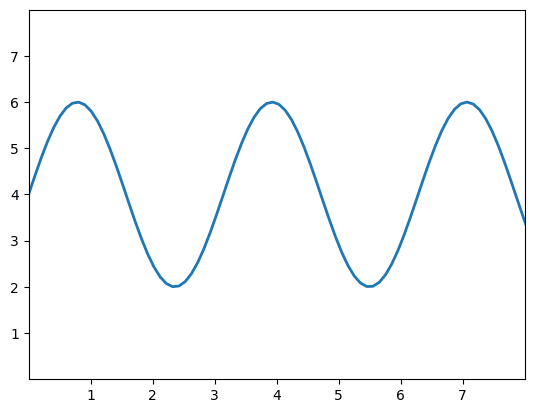

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

## Круговая диаграмма

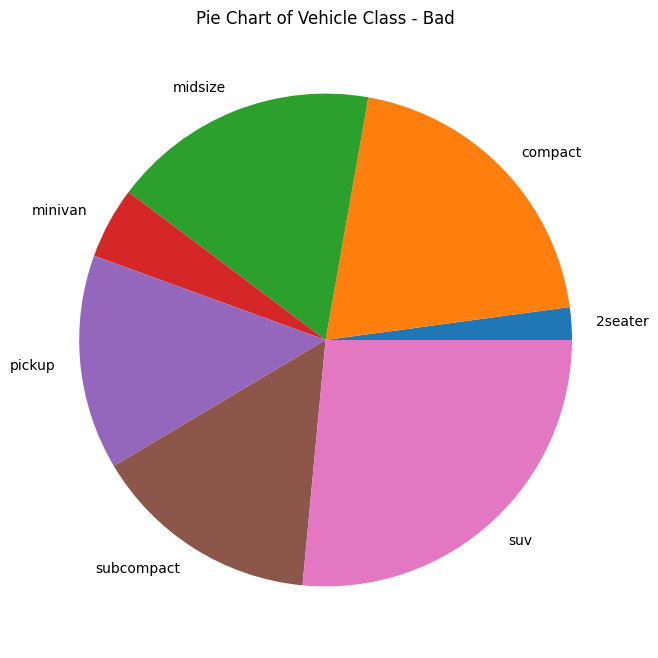

In [73]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

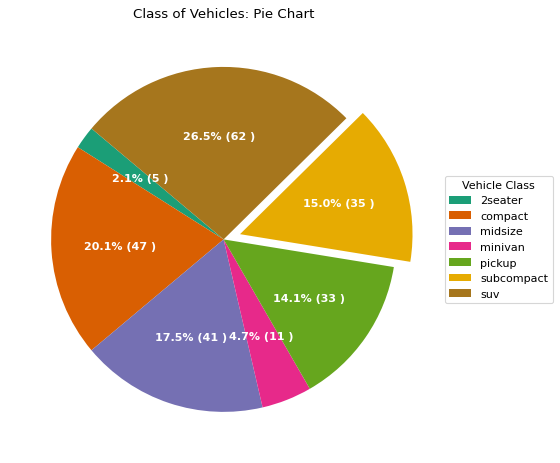

In [74]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

## Гистограмма

C:\Users\Daily\AppData\Local\Temp\ipykernel_7916\3565270188.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')


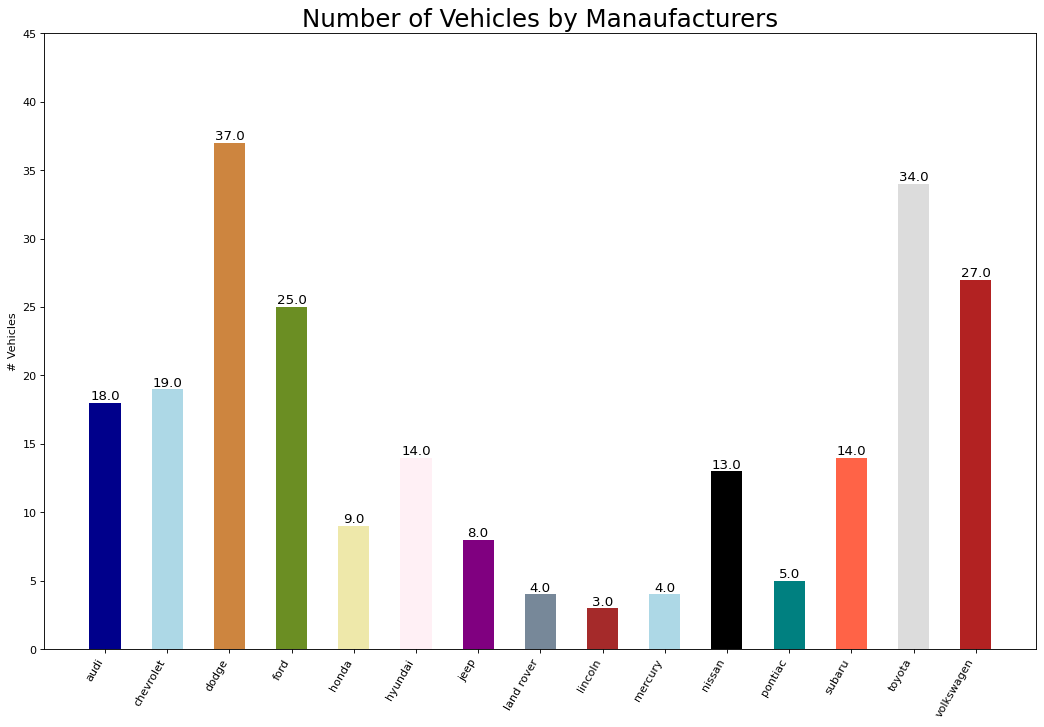

In [75]:
import random

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

## График временного ряда

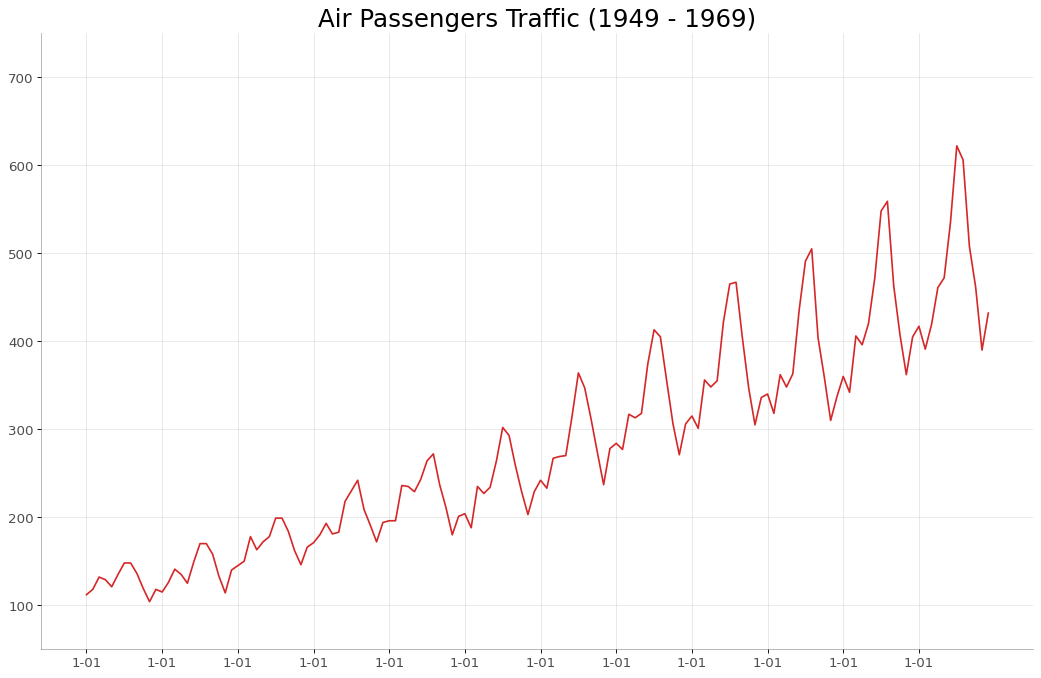

In [76]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'value', data=df, color='tab:red')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

# Plotly

In [80]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

## Линейный график

In [81]:
x = np.arange(0, 5, 0.1)
def f(x):
    return x**2

px.scatter(x=x, y=f(x)).show()

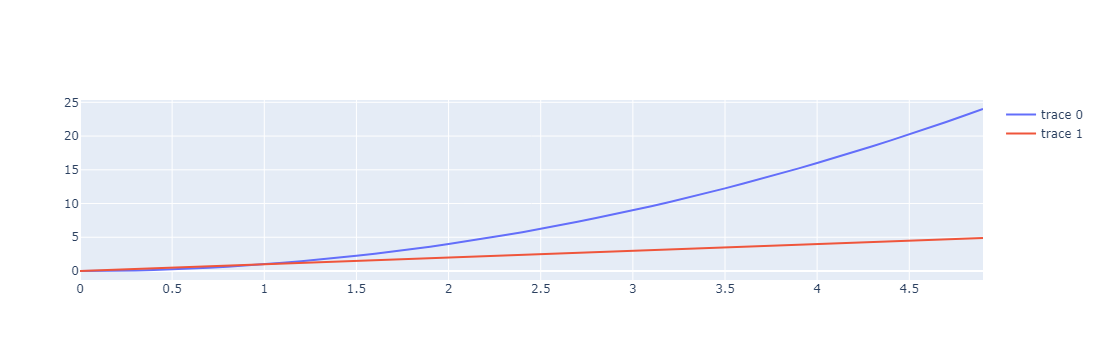

In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x))
fig.show()

## Круговая диаграмма

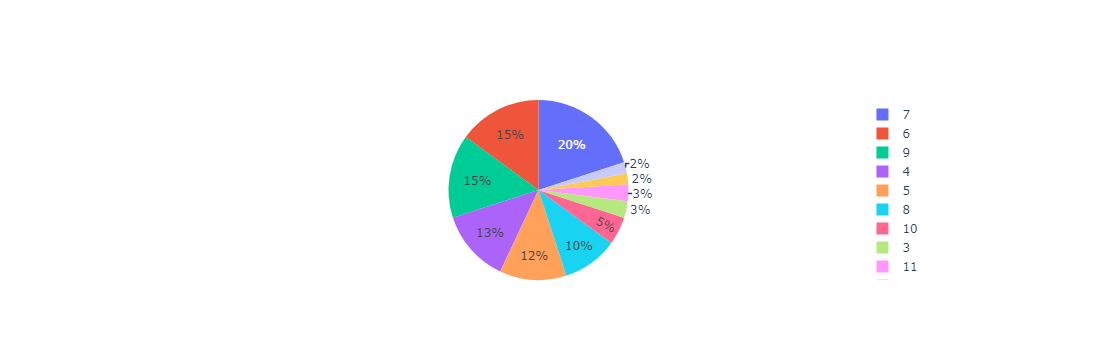

In [88]:
dices = pd.DataFrame(np.random.randint(low=1, high=7, size=(100, 2)), columns=('Кость 1', 'Кость 2'))


dices['Сумма'] = dices['Кость 1'] + dices['Кость 2'] 
# Первые 5 бросков игральных костей

sum_counts = dices['Сумма'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index))
fig.show()

## Гистограмма

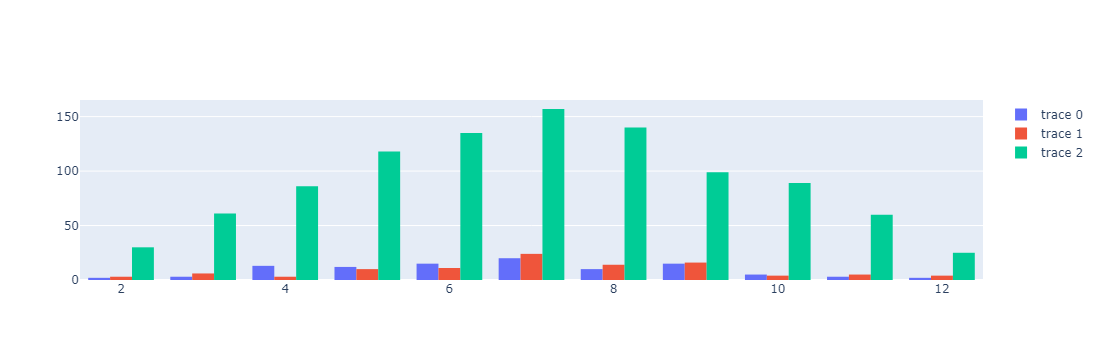

In [89]:
dices2 = pd.DataFrame(np.random.randint(low=1, high=7, size=(100, 2)), columns=('Кость 1', 'Кость 2'))
dices2['Сумма'] = dices2['Кость 1'] + dices2['Кость 2']
dices3 = pd.DataFrame(np.random.randint(low=1, high=7, size=(1000, 2)), columns=('Кость 1', 'Кость 2'))
dices3['Сумма'] = dices3['Кость 1'] + dices3['Кость 2']

fig = go.Figure()
fig.add_trace(go.Histogram(x=dices['Сумма']))
fig.add_trace(go.Histogram(x=dices2['Сумма']))
fig.add_trace(go.Histogram(x=dices3['Сумма']))
fig.show()

## Фреймы

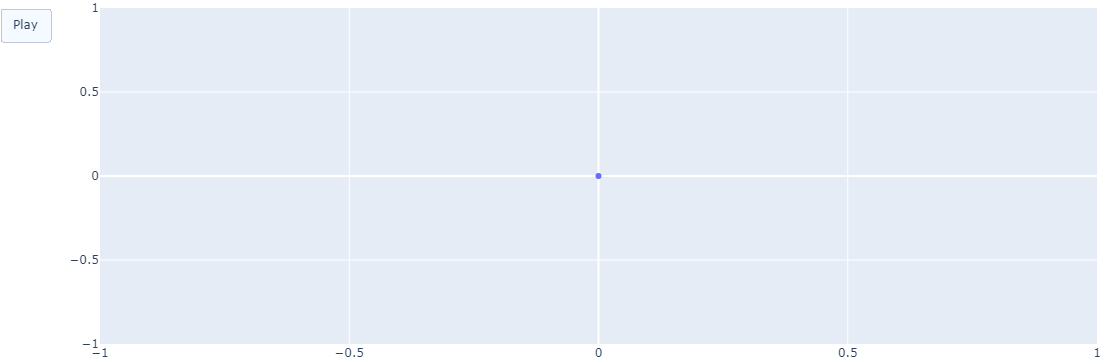

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers',  name='f(x)=x<sup>2</sup>'))

frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]))]))

fig.frames = frames   

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])],
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

## Слайдер

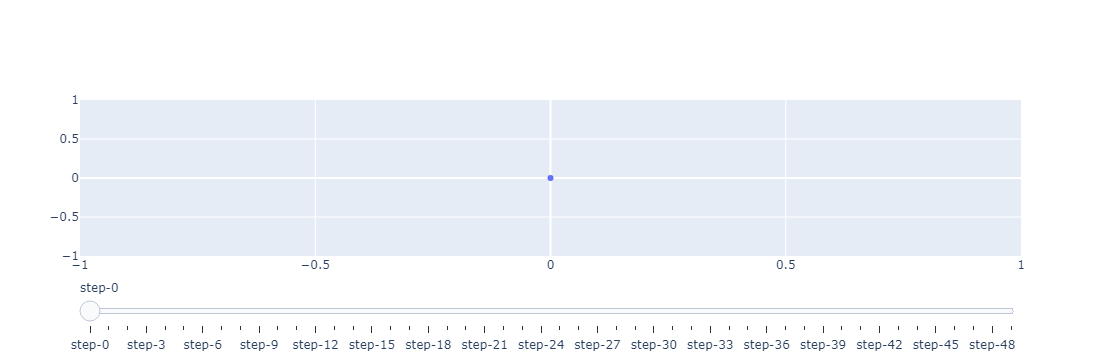

In [85]:
num_steps = len(x)
trace_list = [go.Scatter(visible=True, x=[x[0]], y=[f(x)[0]], mode='lines+markers', name='f(x)=x<sup>2</sup>')]

for i in range(1, len(x)):
    trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=f(x[:i+1]), mode='lines+markers', name='f(x)=x<sup>2</sup>'))

fig = go.Figure(data=trace_list)

steps = []
for i in range(num_steps):
    # Hide all traces
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(fig.data)],
    )
    # Enable trace we want to see
    step['args'][1][i] = True
    
    # Add step to step list
    steps.append(step)

sliders = [dict(
    steps = steps,
)]

fig.layout.sliders = sliders

fig.show()